# Multivariate FTS 

## Data loading

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from pyFTS.data import TAIEX as tx

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = tx.get_dataframe()
df = df.dropna()

train = df.iloc[2000:2500]
test = df.iloc[2500:3000]

## Variable, partitioning and model definitions

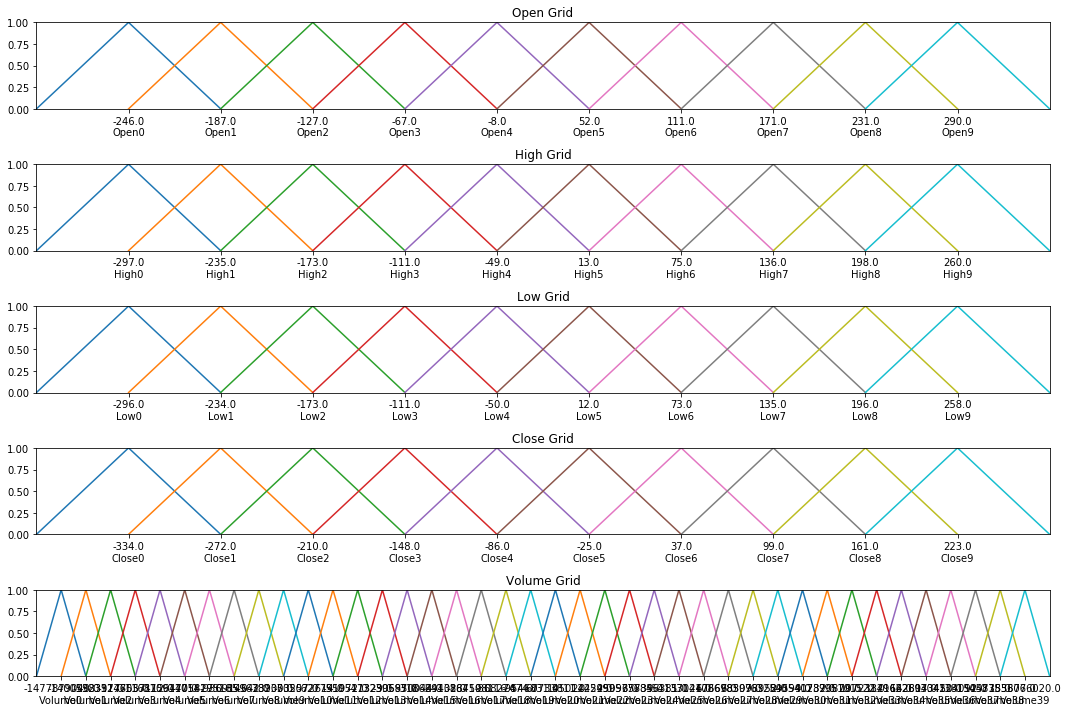

In [3]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.common import Transformations
from pyFTS.models.multivariate import common, variable, mvfts

bc = Transformations.BoxCox(0)
diff = Transformations.Differential(1)

np = 10

model = mvfts.MVFTS("")

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=[15,10])

vopen = variable.Variable("Open", data_label="Openly", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vopen)
vopen.partitioner.plot(axes[0])
vhigh = variable.Variable("High", data_label="Highest", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vhigh)
vhigh.partitioner.plot(axes[1])
vlow = variable.Variable("Low", data_label="Lowermost", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vlow)
vlow.partitioner.plot(axes[2])
vclose = variable.Variable("Close", data_label="Close", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vclose)
vclose.partitioner.plot(axes[3])
vvol = variable.Variable("Volume", data_label="Volume", partitioner=Grid.GridPartitioner, npart=40, data=train,
                        transformation=diff)#train)
model.append_variable(vvol)
vvol.partitioner.plot(axes[4])

model.target_variable = vvol

plt.tight_layout()


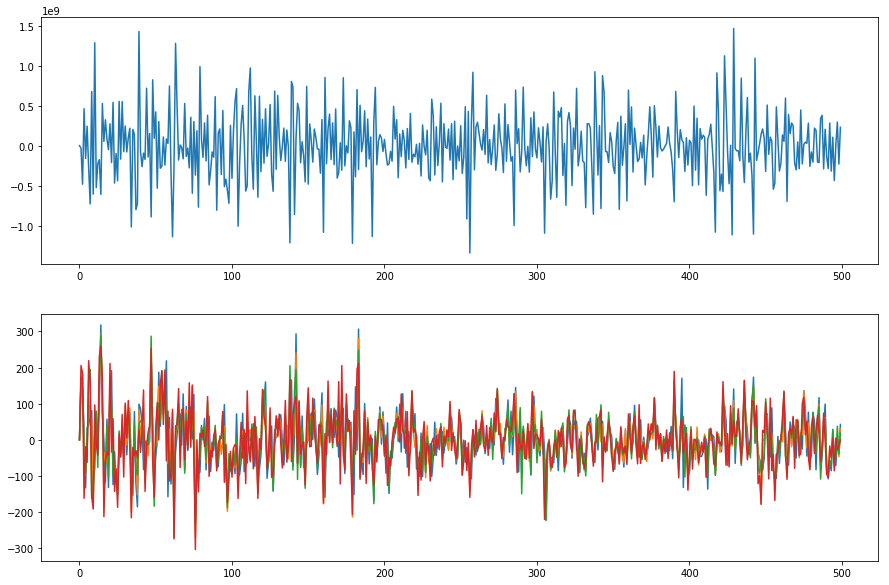

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[15,10])
ax[0].plot(diff.apply(train["Volume"].values), label="Volume")

ax[1].plot(diff.apply(train["Openly"].values, label="Open"))
ax[1].plot(diff.apply(train["Highest"].values, label="Higher"))
ax[1].plot(diff.apply(train["Lowermost"].values, label="Lower"))
ax[1].plot(diff.apply(train["Close"].values, label="Close"))

plt.show()

## Model training and test

In [5]:
model.train(train)
forecasted = model.forecast(test)

/usr/local/lib/python3.6/dist-packages/pyFTS/models/multivariate/mvfts.py:121: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.sum(mv))


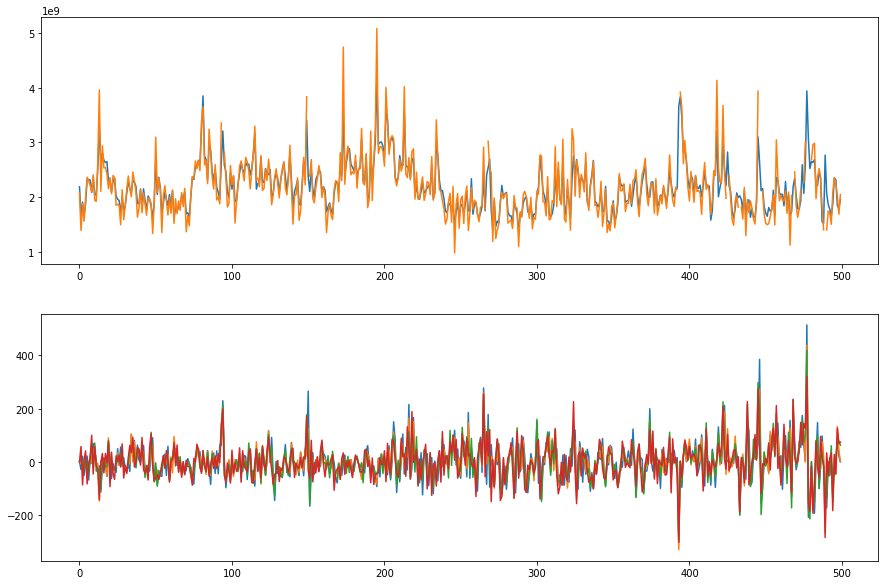

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[15,10])
ax[0].plot(test["Volume"].values, label="Volume")

ax[1].plot(diff.apply(test["Openly"].values, label="Open"))
ax[1].plot(diff.apply(test["Highest"].values, label="Higher"))
ax[1].plot(diff.apply(test["Lowermost"].values, label="Lower"))
ax[1].plot(diff.apply(test["Close"].values, label="Close"))

ax[0].plot(forecasted)

plt.show()

In [ ]:
print(model)